#### 0.1.1 - 2025 - 08 - 01 Aceves
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 6_CNN Clasificación Binaria

# 👟 Clasificación Binaria con CNN - Fashion MNIST

Clasificaremos imágenes de ropa en dos categorías: **Sandalias** (clase 5) y **Zapatillas** (clase 7).

Este ejemplo es sencillo, robusto y perfecto para Google Colab.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 🔽 Cargar y preparar los datos

In [2]:
# Cargar Fashion MNIST
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Filtrar clases 5 (sandalias) y 7 (zapatillas)
train_filter = np.where((train_labels == 5) | (train_labels == 7))
test_filter = np.where((test_labels == 5) | (test_labels == 7))

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Convertir etiquetas a binario: 0 para sandalia (5), 1 para zapatilla (7)
train_labels = (train_labels == 7).astype(int)
test_labels = (test_labels == 7).astype(int)

# Normalizar imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Expandir dimensiones para CNN [28, 28] -> [28, 28, 1]
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Separar validación
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 👁️ Visualizar algunas imágenes

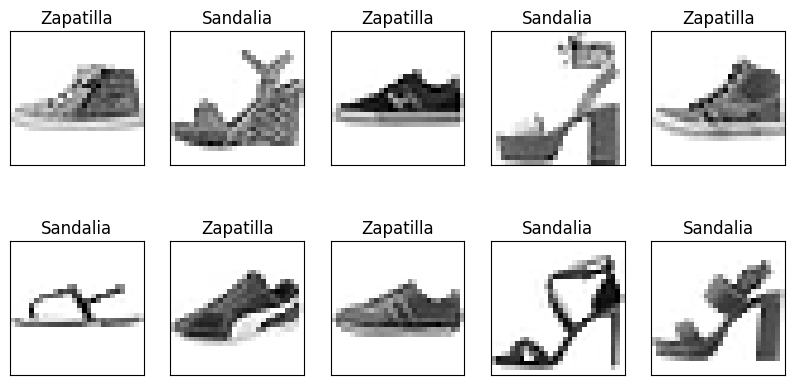

In [3]:
class_names = ['Sandalia', 'Zapatilla']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

## 🧱 Crear modelo CNN simple

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## ⚙️ Compilar y entrenar

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8677 - loss: 0.2882 - val_accuracy: 0.9633 - val_loss: 0.0966
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9717 - loss: 0.0847 - val_accuracy: 0.9737 - val_loss: 0.0680
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9818 - loss: 0.0532 - val_accuracy: 0.9850 - val_loss: 0.0435
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9842 - loss: 0.0445 - val_accuracy: 0.9871 - val_loss: 0.0379
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9881 - loss: 0.0327 - val_accuracy: 0.9871 - val_loss: 0.0353
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9904 - loss: 0.0260 - val_accuracy: 0.9867 - val_loss: 0.0406
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9896 - val_loss: 0.0315
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9940 - loss: 0.0185 - val_

## 📊 Gráficas de desempeño

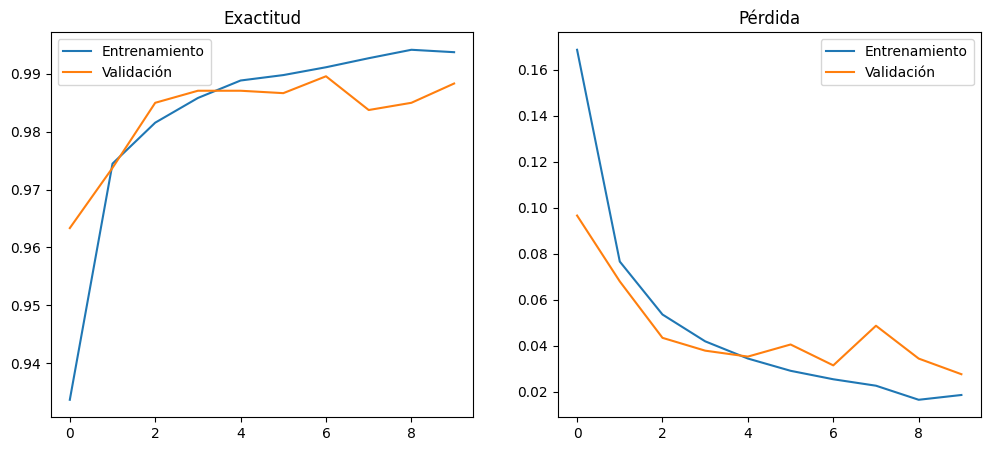

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Entrenamiento')
plt.plot(val_acc, label='Validación')
plt.title('Exactitud')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Pérdida')
plt.legend()
plt.show()

## ✅ Prueba con datos de test

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Exactitud en test: {test_acc:.4f}")

63/63 - 1s - 10ms/step - accuracy: 0.9895 - loss: 0.0321
Exactitud en test: 0.9895
